In [14]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import OneClassSVM
import seaborn as sbn
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle

In [34]:
def do_prediction(X_train, Y_train, X_test, Y_test):
    clf = MLPClassifier(hidden_layer_sizes=(5,), 
                    activation='logistic', 
                    alpha=1e-4,
                    solver='sgd', 
                    tol=1e-4,
                    random_state=1,
                    learning_rate_init=.03, 
                    verbose=True)
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    classif_report = classification_report(Y_test, Y_pred, output_dict=True)
    Y_proba = clf.predict_proba(X_test)
    return Y_pred, classif_report, Y_proba

def plot_multiclass_auc_roc(Y_test, Y_probs):
    classes_list = list(np.unique(Y_test))
    y = label_binarize(Y_test, classes=classes_list)
    num_classes = y.shape[1]
    # print(Y_probs)
    # y_probs = model.predict_proba(np.array(X_test.to_numpy()), cols_d)
    prob_list = np.array([prob_dict for prob_dict in Y_probs])
    
    fpr = dict()
    tpr = dict()
    roc_auc_score = dict()

    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y[:, i], prob_list[:, i])
        roc_auc_score[i] = auc(fpr[i], tpr[i])

    colors = cycle(['red', 'green', 'blue'])
    for i, color in zip(range(num_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, label=f"ROC curve of class {i + 1} , AUC = {roc_auc_score[i]}")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC AUC Curve')
    plt.legend(loc="lower right")
    plt.savefig('../vizualizations/classification/roc_curve.png', bbox_inches='tight', facecolor='white')
    plt.show()

In [16]:
data = pd.read_csv("../data/digits.csv")
data.drop(['Unnamed: 0'], inplace= True, axis= 1)
print(data.head())
print(f"Shape : {data.shape}")

   pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
0        0.0        0.0        5.0       13.0        9.0        1.0   
1        0.0        0.0        0.0       12.0       13.0        5.0   
2        0.0        0.0        0.0        4.0       15.0       12.0   
3        0.0        0.0        7.0       15.0       13.0        1.0   
4        0.0        0.0        0.0        1.0       11.0        0.0   

   pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_7  pixel_7_0  \
0        0.0        0.0        0.0        0.0  ...        0.0        0.0   
1        0.0        0.0        0.0        0.0  ...        0.0        0.0   
2        0.0        0.0        0.0        0.0  ...        0.0        0.0   
3        0.0        0.0        0.0        8.0  ...        0.0        0.0   
4        0.0        0.0        0.0        0.0  ...        0.0        0.0   

   pixel_7_1  pixel_7_2  pixel_7_3  pixel_7_4  pixel_7_5  pixel_7_6  \
0        0.0        6.0       13.0       10.0

In [17]:
classes, class_counts = np.unique(data['target'], return_counts=True)
print(class_counts)
# sbn.histplot(x = [1, 2, 3, 4, 5, 6, 7, 8, 9], y= data['target'])

[178 182 177 183 181 182 181 179 174 180]


In [18]:
X = data.drop(['target'], axis = 1)
Y = data['target']

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

Baseline Model

In [20]:
Y_pred_baseline, baseline_classification_report, Y_proba_baseline = do_prediction(X_train, Y_train, X_test, Y_test)

Iteration 1, loss = 2.35394094
Iteration 2, loss = 2.22873221
Iteration 3, loss = 2.14173916
Iteration 4, loss = 2.06343938
Iteration 5, loss = 1.97984047
Iteration 6, loss = 1.88956681
Iteration 7, loss = 1.80241276
Iteration 8, loss = 1.71803605
Iteration 9, loss = 1.63667256
Iteration 10, loss = 1.55825642
Iteration 11, loss = 1.48650718
Iteration 12, loss = 1.41272760
Iteration 13, loss = 1.34630016
Iteration 14, loss = 1.28364787
Iteration 15, loss = 1.22261510
Iteration 16, loss = 1.16796483
Iteration 17, loss = 1.11325222
Iteration 18, loss = 1.06359202
Iteration 19, loss = 1.01694701
Iteration 20, loss = 0.97919718
Iteration 21, loss = 0.94415936
Iteration 22, loss = 0.89910894
Iteration 23, loss = 0.86754921
Iteration 24, loss = 0.83515688
Iteration 25, loss = 0.81269557
Iteration 26, loss = 0.78506106
Iteration 27, loss = 0.75796719
Iteration 28, loss = 0.74480566
Iteration 29, loss = 0.71461143
Iteration 30, loss = 0.70176307
Iteration 31, loss = 0.67849848
Iteration 32, los

c:\Users\samyj\miniconda3\envs\dmg_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [21]:
print(baseline_classification_report)
baseline_macro_precision, baseline_macro_recall, baseline_macro_f1, baseline_macro_support = precision_recall_fscore_support(Y_test, Y_pred_baseline, average='macro')
baseline_weighted_precision, baseline_weighted_recall, baseline_weighted_f1, baseline_weighted_support = precision_recall_fscore_support(Y_test, Y_pred_baseline, average='weighted')
baseline_accuracy = accuracy_score(Y_test, Y_pred_baseline)

{'0.0': {'precision': 0.95, 'recall': 0.8837209302325582, 'f1-score': 0.9156626506024096, 'support': 43}, '1.0': {'precision': 0.8076923076923077, 'recall': 0.6, 'f1-score': 0.6885245901639345, 'support': 35}, '2.0': {'precision': 0.8048780487804879, 'recall': 0.9166666666666666, 'f1-score': 0.8571428571428571, 'support': 36}, '3.0': {'precision': 0.9024390243902439, 'recall': 0.9024390243902439, 'f1-score': 0.9024390243902439, 'support': 41}, '4.0': {'precision': 0.8809523809523809, 'recall': 0.9736842105263158, 'f1-score': 0.925, 'support': 38}, '5.0': {'precision': 0.8387096774193549, 'recall': 0.8666666666666667, 'f1-score': 0.8524590163934426, 'support': 30}, '6.0': {'precision': 1.0, 'recall': 0.918918918918919, 'f1-score': 0.9577464788732395, 'support': 37}, '7.0': {'precision': 0.9117647058823529, 'recall': 0.8378378378378378, 'f1-score': 0.8732394366197184, 'support': 37}, '8.0': {'precision': 0.7272727272727273, 'recall': 0.8275862068965517, 'f1-score': 0.7741935483870968, 's

In [22]:
print("Baseline Results")
print(f"Accuracy = {baseline_accuracy}")
print(f"Precision --> macro = {baseline_macro_precision}, weighted = {baseline_weighted_precision}")
print(f"Recall    --> macro = {baseline_macro_recall}, weighted = {baseline_weighted_recall}")
print(f"F1-score  --> macro = {baseline_macro_f1}, weighted = {baseline_weighted_f1}")

Baseline Results
Accuracy = 0.8638888888888889
Precision --> macro = 0.8613182556600382, weighted = 0.8677795272105929
Recall    --> macro = 0.860987340331223, weighted = 0.8638888888888889
F1-score  --> macro = 0.8579740935906276, weighted = 0.8627338696955167


Anomaly Detection and Removal

In [23]:
model = OneClassSVM(kernel = "rbf", gamma = "scale", nu = 0.001)
model.fit(X_train)
Y_train_pred = model.predict(X_train)

In [24]:
anomalies_index = np.where(Y_train_pred == -1)
print(f"No. of anomalous samples in dataset : {len(anomalies_index[0])}")
print(f"Anomalies found at indices : {anomalies_index[0]}")


No. of anomalous samples in dataset : 23
Anomalies found at indices : [  16   66  173  194  219  297  349  448  698  779  815  836  857  921
  924  996 1028 1090 1182 1193 1263 1318 1340]


In [25]:
X_train_new = X_train.drop(X_train.index[anomalies_index])
Y_train_new = Y_train.drop(Y_train.index[anomalies_index])

<AxesSubplot:>

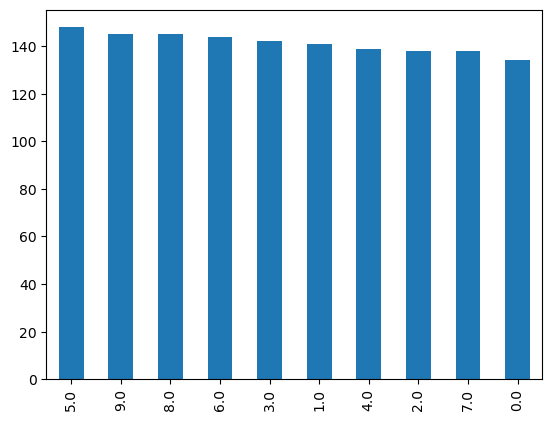

In [36]:
Y_train_new.value_counts().plot(kind='bar')

In [262]:
# X_train_new.describe()

In [263]:
# fig =plt.figure(figsize = (11,11))
# X_train_new.iloc[:,:-1].kurtosis(axis=0).plot(kind='bar')

In [27]:
Y_pred_svm, svm_classification_report, Y_proba_svm = do_prediction(X_train_new, Y_train_new, X_test, Y_test)

Iteration 1, loss = 2.35178232
Iteration 2, loss = 2.23815090
Iteration 3, loss = 2.14296811
Iteration 4, loss = 2.06441421
Iteration 5, loss = 1.98299414
Iteration 6, loss = 1.90701946
Iteration 7, loss = 1.81257209
Iteration 8, loss = 1.73920003
Iteration 9, loss = 1.65330151
Iteration 10, loss = 1.56401504
Iteration 11, loss = 1.51274182
Iteration 12, loss = 1.42650471
Iteration 13, loss = 1.34669358
Iteration 14, loss = 1.28026405
Iteration 15, loss = 1.21565955
Iteration 16, loss = 1.16628428
Iteration 17, loss = 1.12074879
Iteration 18, loss = 1.05998825
Iteration 19, loss = 1.01380215
Iteration 20, loss = 0.98953767
Iteration 21, loss = 0.93993103
Iteration 22, loss = 0.92581192
Iteration 23, loss = 0.88346790
Iteration 24, loss = 0.85161320
Iteration 25, loss = 0.82214825
Iteration 26, loss = 0.78687909
Iteration 27, loss = 0.76381051
Iteration 28, loss = 0.73809313
Iteration 29, loss = 0.71869680
Iteration 30, loss = 0.70315038
Iteration 31, loss = 0.68406345
Iteration 32, los

In [28]:
print(svm_classification_report)
svm_macro_precision, svm_macro_recall, svm_macro_f1, svm_macro_support = precision_recall_fscore_support(Y_test, Y_pred_svm, average='macro')
svm_weighted_precision, svm_weighted_recall, svm_weighted_f1, svm_weighted_support = precision_recall_fscore_support(Y_test, Y_pred_svm, average='weighted')
svm_accuracy = accuracy_score(Y_test, Y_pred_svm)

{'0.0': {'precision': 0.9512195121951219, 'recall': 0.9069767441860465, 'f1-score': 0.9285714285714286, 'support': 43}, '1.0': {'precision': 0.7407407407407407, 'recall': 0.5714285714285714, 'f1-score': 0.6451612903225806, 'support': 35}, '2.0': {'precision': 0.8048780487804879, 'recall': 0.9166666666666666, 'f1-score': 0.8571428571428571, 'support': 36}, '3.0': {'precision': 1.0, 'recall': 0.9024390243902439, 'f1-score': 0.9487179487179488, 'support': 41}, '4.0': {'precision': 0.8837209302325582, 'recall': 1.0, 'f1-score': 0.9382716049382717, 'support': 38}, '5.0': {'precision': 0.9310344827586207, 'recall': 0.9, 'f1-score': 0.9152542372881356, 'support': 30}, '6.0': {'precision': 1.0, 'recall': 0.918918918918919, 'f1-score': 0.9577464788732395, 'support': 37}, '7.0': {'precision': 0.8292682926829268, 'recall': 0.918918918918919, 'f1-score': 0.8717948717948718, 'support': 37}, '8.0': {'precision': 0.6666666666666666, 'recall': 0.896551724137931, 'f1-score': 0.7647058823529411, 'suppor

In [29]:
print("New Model Results")
print(f"Accuracy = {svm_accuracy}")
print(f"Precision --> macro = {svm_macro_precision}, weighted = {svm_weighted_precision}")
print(f"Recall    --> macro = {svm_macro_recall}, weighted = {svm_weighted_recall}")
print(f"F1-score  --> macro = {svm_macro_f1}, weighted = {svm_weighted_f1}")

New Model Results
Accuracy = 0.8722222222222222
Precision --> macro = 0.8736100102628551, weighted = 0.880289147977888
Recall    --> macro = 0.8696606451000239, weighted = 0.8722222222222222
F1-score  --> macro = 0.8666076277421629, weighted = 0.8715593695720898


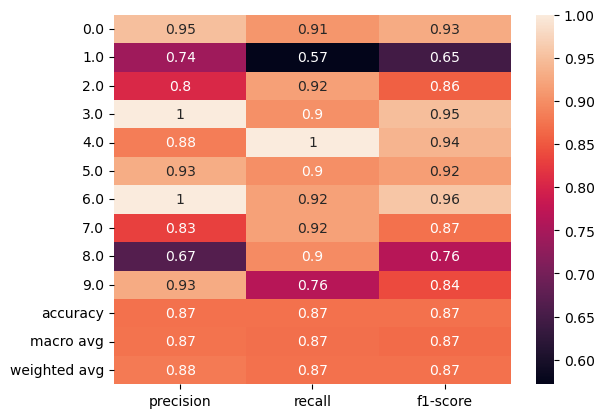

In [32]:
sbn.heatmap(pd.DataFrame(svm_classification_report).iloc[:-1, :].T, annot=True)
plt.savefig("../vizualizations/classification/report_heatmap.png", facecolor='w', bbox_inches='tight')

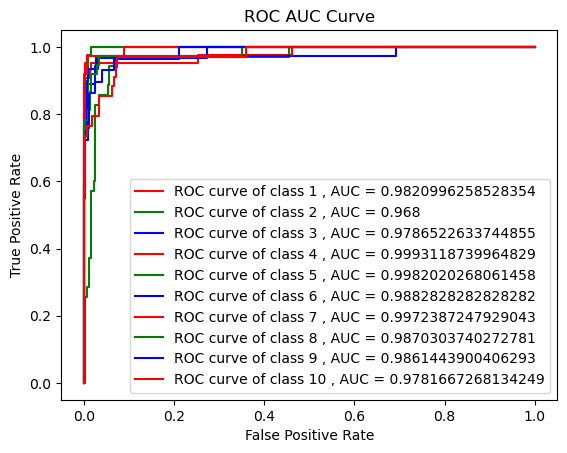

In [35]:
plot_multiclass_auc_roc(Y_test, Y_proba_svm)

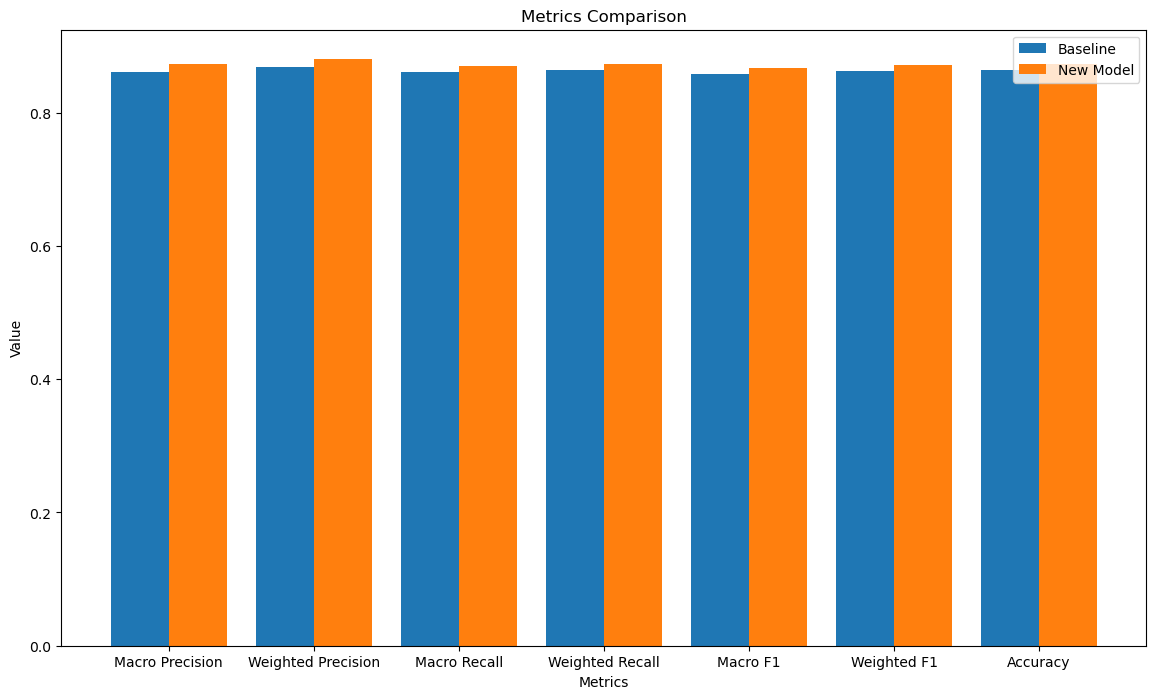

In [33]:
metrics = ['Macro Precision', 'Weighted Precision', 'Macro Recall', 'Weighted Recall', 'Macro F1', 'Weighted F1', 'Accuracy']
metrics_baseline = [baseline_macro_precision, baseline_weighted_precision, baseline_macro_recall, baseline_weighted_recall, baseline_macro_f1, baseline_weighted_f1, baseline_accuracy]
metrics_model = [svm_macro_precision, svm_weighted_precision, svm_macro_recall, svm_weighted_recall, svm_macro_f1, svm_weighted_f1, svm_accuracy]

X_axis = np.arange(len(metrics))

plt.figure(figsize=(14, 8))
plt.bar(X_axis - 0.2, metrics_baseline, 0.4, label = 'Baseline')
plt.bar(X_axis + 0.2, metrics_model, 0.4, label = 'New Model')

plt.xticks(X_axis, metrics)
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Metrics Comparison')
plt.legend()
plt.savefig("../vizualizations/classification/metric_barplot.png", facecolor='w', bbox_inches='tight')
plt.show()